In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
carac = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/e22ba475-45a3-46ac-a0f7-9ca9ed1e283a', sep=';')
lieux = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/2ad65965-36a1-4452-9c08-61a6c874e3e6', sep=';')
vehic = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/780cd335-5048-4bd6-a841-105b44eb2667', sep=';')
us = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/36b1b7b3-84b4-4901-9163-59ae8a9e3028', sep=';')

In [5]:
carac.head()
carac.shape

(58840, 15)

In [6]:
vehic.head()
vehic.shape

(100710, 11)

In [7]:
lieux.head()
lieux.shape

(58840, 18)

In [8]:
us.head()
us.shape

(132977, 15)

In [9]:
# on remarque num_acc est la clé commune aux 4 df

In [10]:
df1=carac.merge(vehic, how='inner', on='Num_Acc')

In [11]:
df2=lieux.merge(us, how='inner', on='Num_Acc')

In [12]:
df=df1.merge(df2, how='inner', on='Num_Acc')

In [13]:
df.head()


,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,201900000001,30,11,2019,01:30,4,93,93053,1,1,...,4,2,2002,0,1,0,-1,-1,-1,-1
1,201900000001,30,11,2019,01:30,4,93,93053,1,1,...,4,2,1993,5,1,0,-1,-1,-1,-1
2,201900000001,30,11,2019,01:30,4,93,93053,1,1,...,1,1,1959,0,1,0,-1,-1,-1,-1
3,201900000001,30,11,2019,01:30,4,93,93053,1,1,...,4,2,2002,0,1,0,-1,-1,-1,-1
4,201900000001,30,11,2019,01:30,4,93,93053,1,1,...,4,2,1993,5,1,0,-1,-1,-1,-1


In [14]:
df.shape

(253488, 56)

In [15]:
df.shape
df=df.drop(columns='an')

In [16]:
df.columns

Index(['Num_Acc', 'jour', 'mois', 'hrmn', 'lum', 'dep', 'com', 'agg', 'int',
       'atm', 'col', 'adr', 'lat', 'long', 'id_vehicule_x', 'num_veh_x',
       'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc',
       'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1',
       'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ', 'vma',
       'id_vehicule_y', 'num_veh_y', 'place', 'catu', 'grav', 'sexe',
       'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp',
       'etatp'],
      dtype='object')

In [17]:
np.count_nonzero(df.isnull().sum(axis = 1).values)
#il y'a toujours au moins une valeurmanquante donc on ne peut pas supprimer les lignes ac valeurs manquantes 
# regardons les colonnes qui ont torp de valeurs manquantes, on les drop 

253488

In [18]:
nan_col=df.isna().sum()
nan_col

Num_Acc               0
jour                  0
mois                  0
hrmn                  0
lum                   0
dep                   0
com                   0
agg                   0
int                   0
atm                   0
col                   0
adr                2021
lat                   0
long                  0
id_vehicule_x         0
num_veh_x             0
senc                  0
catv                  0
obs                   0
obsm                  0
choc                  0
manv                  0
motor                 0
occutc           250730
catr                  0
voie               9400
v1                44935
v2               234282
circ                  0
nbv                   0
vosp                  0
prof                  0
pr                    0
pr1                   0
plan                  0
lartpc           252606
larrout          251969
surf                  0
infra                 0
situ                  0
vma                   0
id_vehicule_y   

In [19]:
nan_col=(nan_col.sort_values(ascending=True)/253488)*100
nan_col

Num_Acc           0.000000
nbv               0.000000
vosp              0.000000
prof              0.000000
pr                0.000000
pr1               0.000000
plan              0.000000
surf              0.000000
infra             0.000000
situ              0.000000
vma               0.000000
circ              0.000000
id_vehicule_y     0.000000
place             0.000000
catu              0.000000
grav              0.000000
sexe              0.000000
an_nais           0.000000
trajet            0.000000
secu1             0.000000
secu2             0.000000
secu3             0.000000
locp              0.000000
num_veh_y         0.000000
actp              0.000000
etatp             0.000000
long              0.000000
com               0.000000
agg               0.000000
int               0.000000
atm               0.000000
col               0.000000
lat               0.000000
id_vehicule_x     0.000000
num_veh_x         0.000000
dep               0.000000
senc              0.000000
m

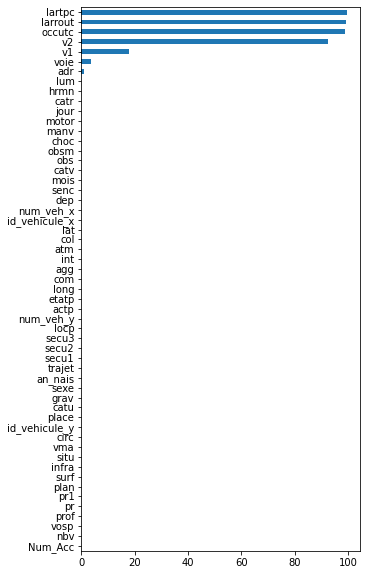

In [20]:
nan_col.plot.barh(figsize=(5,10))
plt.show(block=True)

In [21]:
nan_columns=['lartpc','larrout','occutc','v2','v1','voie'] #ajouter adr????
# voie seulement à 3% mais numéro de la route: utilité????
# adr à 0.8% seulement adr= adresse postale pour les accidents en agglomération, string du type autoroute ... a...
df=df.drop(columns=nan_columns)

In [22]:
np.count_nonzero(df.isnull().sum(axis = 1).values)
# --> plus aucune valeur manquante

2021

In [23]:
df.shape

(253488, 49)

In [24]:
#attention certaines variables ont des valeurs manquantes codées = 'non renseignée' 
#on vérifie une à une 

In [25]:
df['atm'].value_counts()/253488*100
#négligeable

 1    79.599823
 2    10.843511
 8     3.586758
 3     2.308591
 7     1.637158
 4     0.659992
 9     0.559790
 5     0.547955
 6     0.256028
-1     0.000394
Name: atm, dtype: float64

In [26]:
df['circ'].value_counts()/253488*100
#presque 5% on supprime? (utilité de la variable: régime de circulation)

 2    57.907278
 3    19.161065
 1    17.590576
-1     4.691346
 4     0.649735
Name: circ, dtype: float64

In [27]:
df['vosp'].value_counts()/253488*100
#1%: négligeable 
#garder ou pas? Signale l’existence d’une voie réservée, indépendamment du fait que l’accident ait lieu ou non sur
#cette voie.
#(je pense que oui)

 0    91.849713
 1     2.945702
 3     2.783564
 2     1.399672
-1     1.021350
Name: vosp, dtype: float64

In [28]:
df['prof'].value_counts()/253488*100
#on garde (prof=déclivité du terrain )

 1    81.038156
 2    15.451619
 3     1.834406
 4     1.650966
-1     0.024853
Name: prof, dtype: float64

In [29]:
df['plan'].value_counts()/253488*100
#on garde= tracé de la route: droite / courbe droite/ courbe gauche -> peut être rassemblée les deux courbes

 1    83.662343
 3     7.835874
 2     7.392460
 4     1.100644
-1     0.008679
Name: plan, dtype: float64

In [30]:
df['surf'].value_counts()/253488*100
#on garde= état de la route mouillée- humide...

 1    80.303210
 2    18.242678
 9     0.481285
 7     0.395679
 5     0.201587
 3     0.158193
 8     0.129789
 4     0.035110
 6     0.030376
-1     0.022092
Name: surf, dtype: float64

In [31]:
df['infra'].value_counts()/253488*100
#on garde= route/infrastrucute (tunnel-péage...)

 0    83.052847
 5     5.979770
 9     3.183583
 2     2.389462
 1     1.694755
 3     1.685681
 8     0.896689
 6     0.579120
 4     0.397652
 7     0.078110
-1     0.062330
Name: infra, dtype: float64

In [32]:
df['situ'].value_counts()/253488*100
#on garde

 1    91.727025
 3     3.865272
 2     1.300653
 8     1.065928
 5     0.740074
 6     0.650918
 4     0.525469
-1     0.124661
Name: situ, dtype: float64

In [33]:
df['senc'].value_counts()/253488*100
#sens de circulation PK PR???? inconnu et absence de repère différence?
#1 – Non renseigné
#0 – Inconnu
#1 – PK ou PR ou numéro d’adresse postale croissant
#2 – PK ou PR ou numéro d’adresse postale décroissant
#3 – Absence de repère

 1    44.671148
 2    34.740106
 3    13.877974
 0     6.675267
-1     0.035505
Name: senc, dtype: float64

In [34]:
df['obs'].value_counts()/253488*100
#on garde

 0     88.417992
 1      2.118049
 3      1.396516
 13     1.293947
 4      1.129837
 2      0.976378
 6      0.825680
 8      0.804377
 14     0.775185
 12     0.509294
 15     0.408303
 9      0.334927
 16     0.280881
 7      0.248927
 11     0.140046
 5      0.121505
 17     0.095074
 10     0.087973
-1      0.035110
Name: obs, dtype: float64

In [35]:
df['obsm'].value_counts()/253488*100
#on garde

 2    75.915625
 0    13.899277
 1     8.586205
 9     0.826075
 6     0.581093
 4     0.077321
-1     0.076532
 5     0.037872
Name: obsm, dtype: float64

In [36]:
df['choc'].value_counts()/253488*100
#on garde

 1    35.735419
 3    14.789655
 4    13.055845
 2    11.397384
 8     6.620826
 7     5.339503
 0     4.715805
 6     3.911033
 5     3.021839
 9     1.367718
-1     0.044973
Name: choc, dtype: float64

In [37]:
df['manv'].value_counts()/253488*100
#ici manoeuvre principale avant l'accident 0=inconnue 1=non renseignée, la + des 2= 5.5%, différence? 

 1     39.661444
 2     14.461829
 15     7.543947
 0      5.412091
 13     4.480291
 23     3.524033
 17     3.418308
 26     3.212775
 9      2.722022
 19     2.357114
 16     2.175645
 14     1.570094
 21     1.453323
 11     1.174020
 5      1.152323
 12     1.119580
 3      1.102616
 10     0.696285
 18     0.518762
 20     0.503377
 24     0.441836
 4      0.403175
 22     0.299028
 7      0.221707
 25     0.173578
 6      0.126239
-1      0.037477
 8      0.037083
Name: manv, dtype: float64

In [38]:
df['motor'].value_counts()/253488*100
#type de moteur 

 1    82.400745
 0    10.363410
 5     3.451445
 6     1.386259
 3     1.261204
 2     0.768084
-1     0.298239
 4     0.070615
Name: motor, dtype: float64

In [39]:
#variable trajet: motif du trajet, on remplace 0 par _1 car les sont 'non renseignés'
df['trajet']=df['trajet'].replace([0],-1)
df['trajet'].value_counts()/253488*100
#-> 27% de non renseigné: on supprime 'trajet'

 5    37.615982
-1    27.216278
 1    13.743057
 4    10.154721
 9     7.102900
 3     2.359086
 2     1.807975
Name: trajet, dtype: float64

In [40]:
df['secu1'].value_counts()/253488*100
#garde

 1    65.627170
 2    17.663953
 8    11.807660
 0     3.675125
 3     0.803588
 9     0.140046
 5     0.092707
 6     0.074954
 4     0.060358
-1     0.052468
 7     0.001972
Name: secu1, dtype: float64

In [41]:
df['secu2'].value_counts()/253488*100
#30% non renseigné pour utilisation d'un 2eme equipement
#on garde?

 0    44.655763
-1    29.097630
 8    14.442893
 6     8.525847
 5     1.413874
 4     0.960598
 9     0.262734
 2     0.237881
 7     0.165688
 1     0.148330
 3     0.088762
Name: secu2, dtype: float64

In [42]:
df['secu3'].value_counts()/253488*100
#on drop secu3

-1    98.916714
 9     0.629221
 0     0.334927
 8     0.050890
 6     0.040239
 4     0.010257
 1     0.009862
 3     0.003550
 5     0.002761
 2     0.001578
Name: secu3, dtype: float64

In [ ]:
df['locp'].value_counts()/253488*100
#localisation piéton: 41% du temps non renseigné 53% sans objet, donc seulement 87% des accidents qui impliquent un piéton
#on a pas la position de ce dernier 
# on drop

In [ ]:
df['actp'].value_counts()/253488*100
#pareil 21% non renseigné, 73% sans objet donc 78% des cas ou c'est relevant on a pas l'info 
#on drop


In [ ]:
df['etatp'].value_counts()/253488*100
#pareil 95% du temps non renseigné 
# on doit drop toutes les info concernant le piéton --> on aura la sévérité en fonction des info véhicules- conducteur....

In [46]:
df=df.drop(columns=['trajet','secu2','secu3','actp','etatp'])

In [47]:
df.shape

(253488, 44)